# Implement the Continuous Bag of Words (CBOW) Model. Stages can be:
## **a. Data preparation**
## **b. Generate training data**
## **c. Train model**
## **d. Output**

## IMPORTING LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np
%matplotlib inline

## **a. Data preparation**

In [2]:
import re

In [3]:
with open('5.text.txt', 'r') as file:
    sentences = file.read()

In [4]:
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)

sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

sentences = sentences.lower()

In [5]:
sentences

'we are about to study the idea of computational process computational processes are abstract beings that inhabit computers as they evolve processes manipulate other abstract things called data the evolution of process is directed by pattern of rules called program people create programs to direct processes in effect we conjure the spirits of the computer with our spells'

In [6]:
words = sentences.split()
vocab = set(words)

In [7]:
words

['we',
 'are',
 'about',
 'to',
 'study',
 'the',
 'idea',
 'of',
 'computational',
 'process',
 'computational',
 'processes',
 'are',
 'abstract',
 'beings',
 'that',
 'inhabit',
 'computers',
 'as',
 'they',
 'evolve',
 'processes',
 'manipulate',
 'other',
 'abstract',
 'things',
 'called',
 'data',
 'the',
 'evolution',
 'of',
 'process',
 'is',
 'directed',
 'by',
 'pattern',
 'of',
 'rules',
 'called',
 'program',
 'people',
 'create',
 'programs',
 'to',
 'direct',
 'processes',
 'in',
 'effect',
 'we',
 'conjure',
 'the',
 'spirits',
 'of',
 'the',
 'computer',
 'with',
 'our',
 'spells']

In [8]:
vocab

{'about',
 'abstract',
 'are',
 'as',
 'beings',
 'by',
 'called',
 'computational',
 'computer',
 'computers',
 'conjure',
 'create',
 'data',
 'direct',
 'directed',
 'effect',
 'evolution',
 'evolve',
 'idea',
 'in',
 'inhabit',
 'is',
 'manipulate',
 'of',
 'other',
 'our',
 'pattern',
 'people',
 'process',
 'processes',
 'program',
 'programs',
 'rules',
 'spells',
 'spirits',
 'study',
 'that',
 'the',
 'they',
 'things',
 'to',
 'we',
 'with'}

In [9]:
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

In [10]:
vocab_size

43

In [11]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

In [12]:
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]


## **b. Generate training data**

In [13]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

In [14]:
embeddings

array([[0.46940065, 0.92834285, 0.94621083, 0.64853163, 0.89006479,
        0.84232167, 0.88385557, 0.49508733, 0.12712791, 0.0966887 ],
       [0.22187568, 0.61809962, 0.76574319, 0.72448672, 0.74966793,
        0.2562701 , 0.29560318, 0.37599102, 0.42794417, 0.86737682],
       [0.07380094, 0.34615693, 0.52055442, 0.79168075, 0.25637446,
        0.12146005, 0.82399761, 0.19611441, 0.71737713, 0.41711509],
       [0.66243608, 0.01008031, 0.83601248, 0.70936461, 0.02013868,
        0.67400197, 0.31955342, 0.33310718, 0.24745502, 0.07874621],
       [0.5542219 , 0.34580282, 0.31286222, 0.33810318, 0.6926444 ,
        0.84133149, 0.41508953, 0.19632446, 0.25633326, 0.67787742],
       [0.39912907, 0.01789508, 0.23586064, 0.55355297, 0.80602792,
        0.98140297, 0.39034319, 0.38216469, 0.03829147, 0.54403924],
       [0.6340847 , 0.32674815, 0.33493058, 0.25106352, 0.80119791,
        0.63902668, 0.01460204, 0.07386377, 0.42298178, 0.19372247],
       [0.05456145, 0.41743594, 0.0109695

In [15]:
embeddings.shape

(43, 10)

# **Linear Model**

In [16]:
def linear(m, theta):
    w = theta
    return m.dot(w)

# **Log softmax + NLLloss = Cross Entropy**

In [17]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

In [18]:
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [19]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)

    return (- out + softmax) / logits.shape[0]

# **Forward function**

In [20]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)

    return m, n, o

# **Backward function**

In [21]:
def backward(preds, theta, target_idxs):
    m, n, o = preds

    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)

    return dw

# **Optimize function**

In [22]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

## **c. Train model**

In [23]:
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

In [24]:
theta

array([[ 0.97966554, -0.29222202, -0.09204216, ..., -0.70347986,
         0.03088237, -0.65116746],
       [ 0.38820823,  0.51548504, -0.08072998, ..., -0.93771629,
         0.31256101, -0.89177491],
       [ 0.11025673,  0.46589161,  0.94800791, ..., -0.39895031,
        -0.55385165,  0.84688889],
       ...,
       [ 0.54004887, -0.13220488, -0.94234266, ...,  0.96995085,
         0.63153432, -0.43272914],
       [ 0.08948064, -0.83723163, -0.03691928, ...,  0.28225585,
        -0.67245999, -0.46156357],
       [-0.99575069,  0.03792637, -0.90764763, ...,  0.91340732,
         0.71219387,  0.50133173]])

In [25]:
theta.shape

(40, 43)

In [26]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)


    epoch_losses[epoch] = losses

In [27]:
losses

[0.35903553096545465,
 0.2514874959772144,
 0.3756793715146575,
 0.3714849083003956,
 0.43995272980075895,
 0.35284417068715745,
 0.5706660053005455,
 0.33528375417537665,
 0.5113429891398965,
 0.6368417517818555,
 0.32411276309181974,
 0.33842508489106327,
 0.8496321789021739,
 0.7356294219357835,
 0.5013936357162095,
 0.5621497894142312,
 0.5929403378241377,
 0.5747395461749306,
 0.4908008522551771,
 0.8683584689595684,
 0.3262964178746263,
 0.5820840129874804,
 0.5415501017194916,
 0.5174482797989515,
 0.6481965689380453,
 0.4381021773835066,
 0.416389412528247,
 0.6807740533239046,
 0.6251250339647575,
 0.2975761650764556,
 0.6487732009591571,
 0.7083574007292294,
 0.46845572563940313,
 0.37979307120596256,
 0.44579655446490724,
 0.34899403878724106,
 0.32316430208457,
 0.410486296109986,
 0.29043440503366175,
 0.40508648674339665,
 0.6284044162765758,
 0.4404426167593725,
 0.3842091798294967,
 0.49156522609481984,
 0.3327136366429936,
 0.4352114455299992,
 0.4195048909706539,
 0.3

## **d. Output**

Text(0, 0.5, 'Losses')

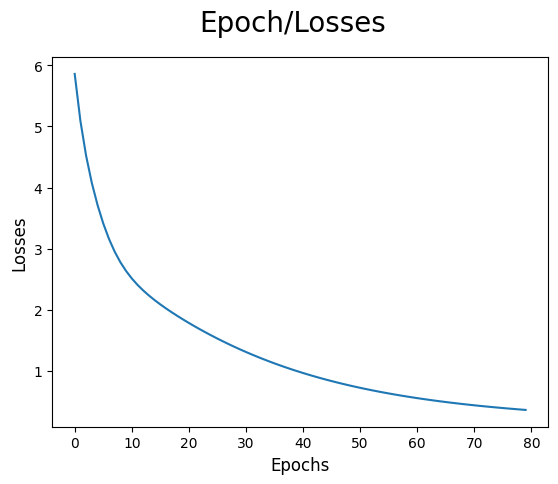

In [28]:
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [29]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]

    return word

In [30]:
# (['we', 'are', 'to', 'study'], 'about')
predict(['we', 'are', 'to', 'study'])

'about'

In [31]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1

    return (1 - (wrong / len(data)))

In [32]:
accuracy()

1.0

In [33]:
predict(['processes', 'manipulate', 'things', 'study'])

'abstract'